In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('E-commerce Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [ ]:
df.head(5)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [ ]:
df.shape

(51290, 16)

In [ ]:
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [ ]:
df.dtypes

Order_Date              object
Time                    object
Aging                  float64
Customer_Id              int64
Gender                  object
Device_Type             object
Customer_Login_type     object
Product_Category        object
Product                 object
Sales                  float64
Quantity               float64
Discount               float64
Profit                 float64
Shipping_Cost          float64
Order_Priority          object
Payment_method          object
dtype: object

In [ ]:
# drop the null values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         0
Payment_method         0
dtype: int64

In [ ]:
df['amount_spent']= df['Quantity']*df['Sales']

## How much money spent by the customers?

In [ ]:
money_spent = df.groupby('Customer_Id')['amount_spent'].sum()
money_spent

Customer_Id
10000    293.0
10002    298.0
10004    340.0
10006    660.0
10013    159.0
         ...  
99990    234.0
99991     85.0
99992    124.0
99993    366.0
99999     62.0
Name: amount_spent, Length: 38990, dtype: float64

In [ ]:
# Create the plot
plt.figure(figsize=(5, 5))
plt.plot(money_spent.Customer_Id, money_spent.amount_spent)
plt.xlabel('Customer ID')
plt.ylabel('Money Spent (Dollar)')
plt.title('Money Spent for Different Customers')
plt.show()

In [ ]:
# Check TOP 5 highest money spent
# print('The TOP 5 customers with highest money spent')
top_spenders = money_spent.sort_values(ascending=False).head()
top_spenders

Customer_Id
87989    4029.0
62202    3517.0
45491    3340.0
16997    3287.0
69462    3271.0
Name: amount_spent, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51282 entries, 0 to 51289
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51282 non-null  object 
 1   Time                 51282 non-null  object 
 2   Aging                51282 non-null  float64
 3   Customer_Id          51282 non-null  int64  
 4   Gender               51282 non-null  object 
 5   Device_Type          51282 non-null  object 
 6   Customer_Login_type  51282 non-null  object 
 7   Product_Category     51282 non-null  object 
 8   Product              51282 non-null  object 
 9   Sales                51282 non-null  float64
 10  Quantity             51282 non-null  float64
 11  Discount             51282 non-null  float64
 12  Profit               51282 non-null  float64
 13  Shipping_Cost        51282 non-null  float64
 14  Order_Priority       51282 non-null  object 
 15  Payment_method       51282 non-null  obje

In [ ]:
# convert the Order_Date column from string to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

### Plot a bar graph of the order priority for each product category

Text(0, 0.5, 'Number of Order Priority')

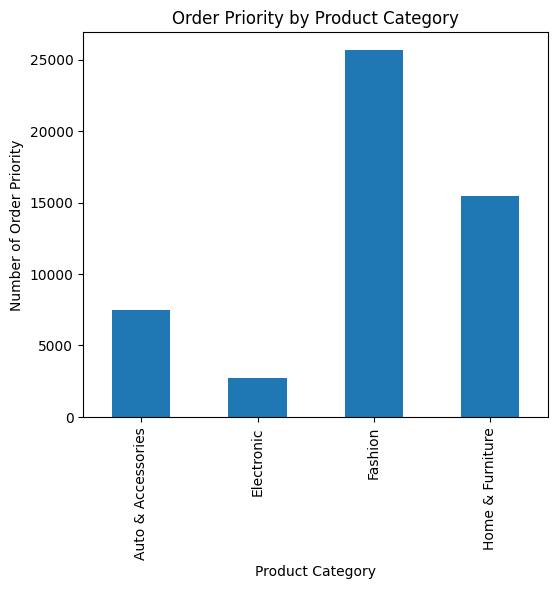

In [ ]:
df.groupby('Product_Category').count()['Order_Priority'].plot(kind='bar',figsize=(6,5))
# Add a title and axis labels to the graph
plt.title("Order Priority by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Order Priority")

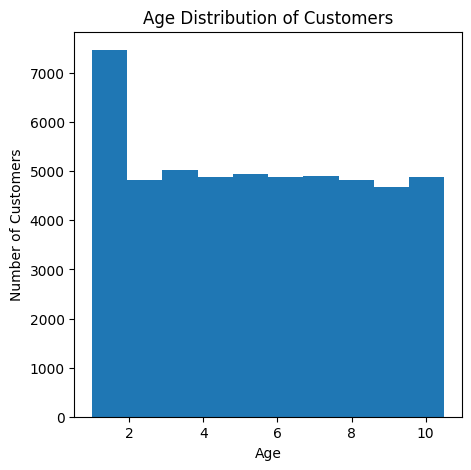

In [ ]:
# Plot a histogram of the age of customers
plt.figure(figsize=(8, 5))
df.Aging.plot(kind='hist')
# Add a title and axis labels to the graph
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()

### Plot a scatter plot of sales vs. age

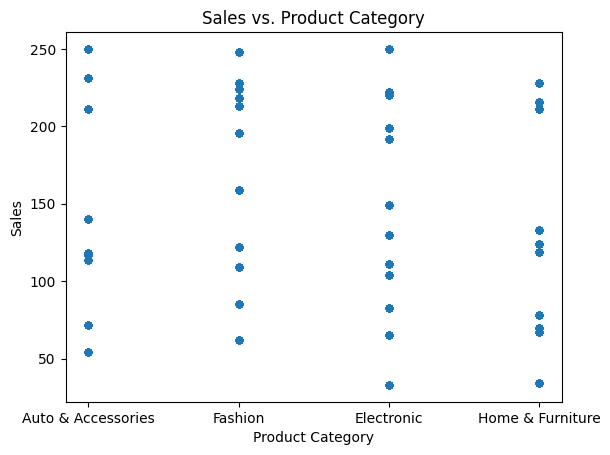

In [ ]:
# Plot a scatter plot of  vs. age
df.plot(kind='scatter', x='Product_Category', y='Sales')


# Add a title and axis labels to the graph
plt.title("Sales vs. Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales")

# Show the plot
plt.show()

### Plot a scatter plot of sales vs. age

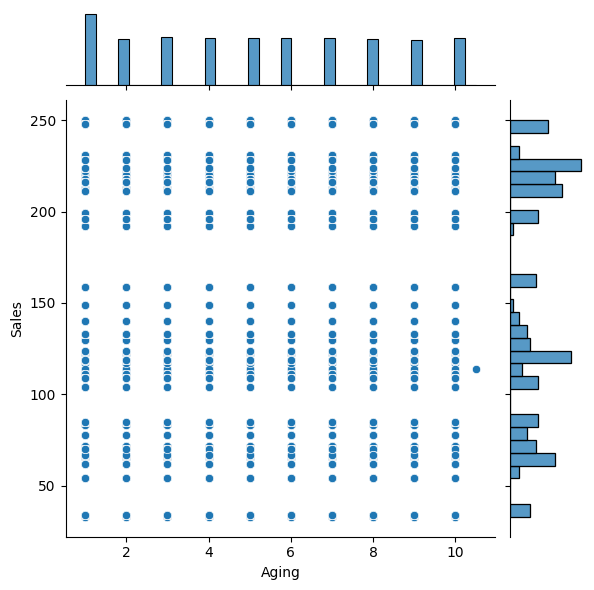

In [ ]:
sns.jointplot(x='Aging', y='Sales', data=df)

### Plot a line graph of the average sales of products over time

In [ ]:
df['Month'] = df['Order_Date'].dt.strftime('%B')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51282 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51282 non-null  datetime64[ns]
 1   Time                 51282 non-null  object        
 2   Aging                51282 non-null  float64       
 3   Customer_Id          51282 non-null  int64         
 4   Gender               51282 non-null  object        
 5   Device_Type          51282 non-null  object        
 6   Customer_Login_type  51282 non-null  object        
 7   Product_Category     51282 non-null  object        
 8   Product              51282 non-null  object        
 9   Sales                51282 non-null  float64       
 10  Quantity             51282 non-null  float64       
 11  Discount             51282 non-null  float64       
 12  Profit               51282 non-null  float64       
 13  Shipping_Cost        51282 non-null 

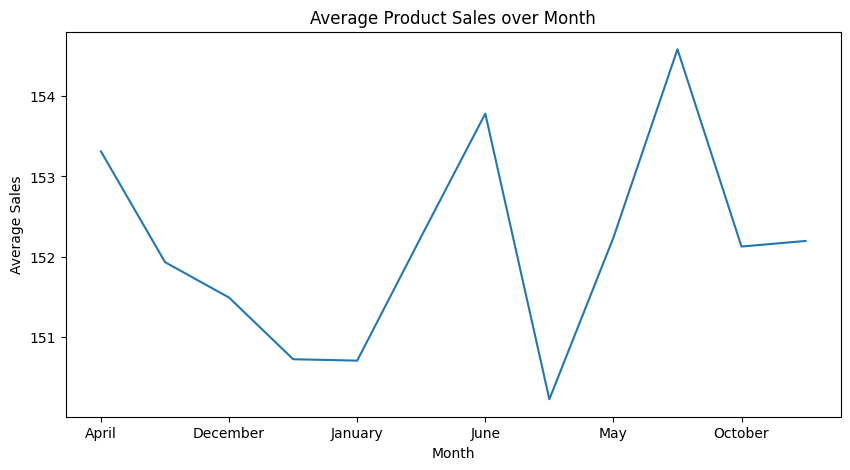

In [ ]:
df.groupby('Month')['Sales'].mean().plot(figsize=(10,5))


# Add a title and axis labels to the graph
plt.title("Average Product Sales over Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")

# Show the plot
plt.show()

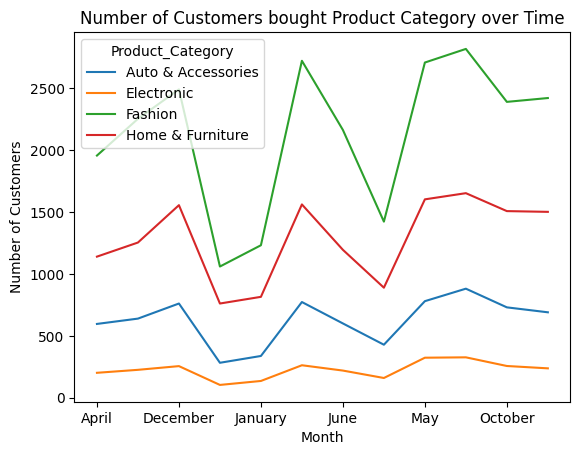

In [ ]:
df.groupby(['Month', 'Product_Category']).count()['Customer_Id'].unstack().plot(kind='line')

# Add a title and axis labels to the graph
plt.title("Number of Customers bought Product Category over Time")
plt.xlabel("Month")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()

this shows no of customers from each category for every month